In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

from IPython.display import display

import seaborn as sns
sns.set_theme()

from utils import *

In [37]:
results_orginal = pd.read_csv("../results_gathering/results_table.csv")
results_orginal.head()

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
0,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
1,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
2,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
3,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
4,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt


In [38]:
results_orginal.columns

Index(['pred_text', 'pred_text_len', 'pred_x', 'pred_y', 'pred_x1', 'pred_x2',
       'pred_y1', 'pred_y2', 'pred_width', 'pred_hight', 'text', 'text_len',
       'x', 'y', 'x1', 'x2', 'y1', 'y2', 'width', 'hight', 'detection_status',
       'recogniton_status', 'redable_label', 'iou', 'labels_file_name',
       'detections_file_name', 'recognition_file_name', 'image_name',
       'image_width', 'image_height', 'dataset', 'model', 'weights'],
      dtype='object')

In [39]:
# Remove non readable examples
print(f"Len of results table with all examples: {len(results_orginal)}")
results_orginal = results_orginal[results_orginal.redable_label == True]
print(f"Len of results table without non readable examples: {len(results_orginal)}")

Len of results table with all examples: 38334
Len of results table without non readable examples: 24389


In [40]:
results_orginal.columns

Index(['pred_text', 'pred_text_len', 'pred_x', 'pred_y', 'pred_x1', 'pred_x2',
       'pred_y1', 'pred_y2', 'pred_width', 'pred_hight', 'text', 'text_len',
       'x', 'y', 'x1', 'x2', 'y1', 'y2', 'width', 'hight', 'detection_status',
       'recogniton_status', 'redable_label', 'iou', 'labels_file_name',
       'detections_file_name', 'recognition_file_name', 'image_name',
       'image_width', 'image_height', 'dataset', 'model', 'weights'],
      dtype='object')

In [41]:
path =  "./text_size_plots"
kategoria = "rozmiar_tekstu"

In [42]:
split_column = 'width'

In [43]:
detections = results_orginal[results_orginal.text != '-'][['dataset', 'text_len', 'width', 'hight']]
detections = detections[detections.dataset == 'ic15']
detections.text_len = detections.text_len.astype('int')
# detections = detections[detections.text_len != 0]
detections.width = detections.width.astype('int')
detections.hight = detections.hight.astype('int')
# detections = detections.sort_values(by='text_len')
detections.head()

,dataset,text_len,width,hight
8,ic15,11,110,36
9,ic15,5,47,21
10,ic15,4,42,26
11,ic15,3,42,28
12,ic15,4,65,28


In [44]:
results[results.dataset=="ic15"].head()

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
9,areas,5,[151 199 201 153],[ 84 79 97 102],151,201,79,102,50,23,...,0.858261,gt_img_10.txt,detection_res_img_10.txt,recognition_res_img_10.txt,img_10.jpg,1280,720,ic15,db,tt
10,pass,4,[139 186 188 140],[55 52 75 78],139,188,52,78,49,26,...,0.797872,gt_img_10.txt,detection_res_img_10.txt,recognition_res_img_10.txt,img_10.jpg,1280,720,ic15,db,tt
11,you,3,[ 95 142 145 98],[54 48 81 86],95,145,48,86,50,38,...,0.618947,gt_img_10.txt,detection_res_img_10.txt,recognition_res_img_10.txt,img_10.jpg,1280,720,ic15,db,tt
13,volume,6,[201 254 254 201],[27 27 49 49],201,254,27,49,53,22,...,0.857633,gt_img_10.txt,detection_res_img_10.txt,recognition_res_img_10.txt,img_10.jpg,1280,720,ic15,db,tt
14,you,3,[162 198 198 162],[26 26 49 49],162,198,26,49,36,23,...,0.871579,gt_img_10.txt,detection_res_img_10.txt,recognition_res_img_10.txt,img_10.jpg,1280,720,ic15,db,tt


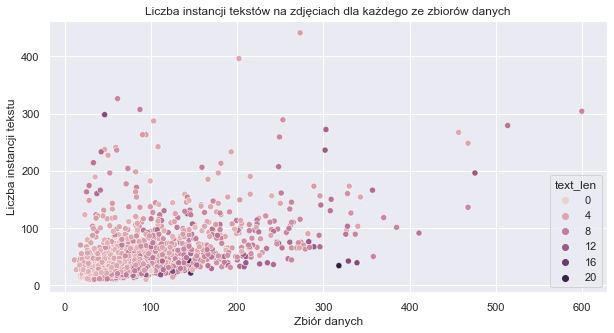

In [46]:
fig, ax = plt.subplots( figsize=(10, 5))
sns.scatterplot(data=detections, x='width', y='hight', hue='text_len', ax=ax)
ax.set_title("Liczba instancji tekstów na zdjęciach dla każdego ze zbiorów danych")
ax.set_xlabel("Zbiór danych")
ax.set_ylabel("Liczba instancji tekstu")
fig.savefig(f"{path}/textsize.png")

In [10]:
split_conditions = {
    "0-50 px": (0, 51),
    "51-100 px": (51, 101),
    "101-200 px": (101, 201),
    "200+ px":(201, np.inf)
}
detection_indexes = {}
for key, value in split_conditions.items():
    indexes = list(detections[(detections.width.between(*value, inclusive="left")) &
                              (detections.hight.between(*value, inclusive="left"))].index)
    detection_indexes[key] = indexes    
    print(len(indexes))

2472
704
201
44


In [11]:
dfs = []
for key, indexes in detection_indexes.items():
#     imgs = random.sample(imgs, 27)
    df_temp = results_orginal[results_orginal.index.isin(indexes)]
    df_temp[split_column] = key
    dfs.append(df_temp)
#     print(df_temp)
    print(df_temp.shape)
finaldf = pd.concat(dfs)

(2472, 33)
(704, 33)
(201, 33)
(44, 33)


<ipython-input-11-58c7c36c48d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[split_column] = key


In [12]:
finaldf.image_name.nunique()

338

## Detection results analysis

In [13]:
results = finaldf

In [14]:
models_list = list(results.model.unique())
weights_list = list(results.weights.unique())

In [15]:
categories = list(pd.unique(results[split_column]))
# categories.sort()
print(categories)

['0-50 px', '51-100 px', '101-200 px', '200+']


In [16]:
detection_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    detection_metrics[category] = detection_metrics_to_df(df, models_list, weights_list)
    detection_metrics[category].drop(columns=['precyzja', 'f1'], inplace=True)


In [17]:
for key, value in detection_metrics.items():
    print(key)
    
    display(value)

0-50 px


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,53.07
1,System z modelem db wytrenowany na zbiorze ic15,76.70
2,System z modelem textfusenet wytrenowany na zb...,21.36
3,System z modelem textfusenet wytrenowany na zb...,50.65


51-100 px


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,73.86
1,System z modelem db wytrenowany na zbiorze ic15,77.27
2,System z modelem textfusenet wytrenowany na zb...,68.75
3,System z modelem textfusenet wytrenowany na zb...,81.82


101-200 px


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,86.27
1,System z modelem db wytrenowany na zbiorze ic15,78.00
2,System z modelem textfusenet wytrenowany na zb...,80.00
3,System z modelem textfusenet wytrenowany na zb...,86.00


200+


,system,pełność
0,System z modelem db wytrenowany na zbiorze tt,81.82
1,System z modelem db wytrenowany na zbiorze ic15,63.64
2,System z modelem textfusenet wytrenowany na zb...,81.82
3,System z modelem textfusenet wytrenowany na zb...,81.82


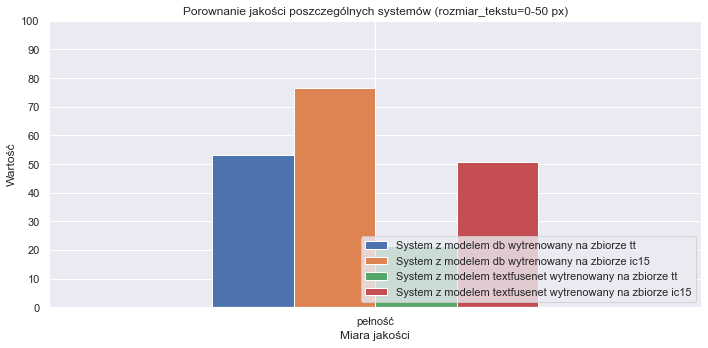

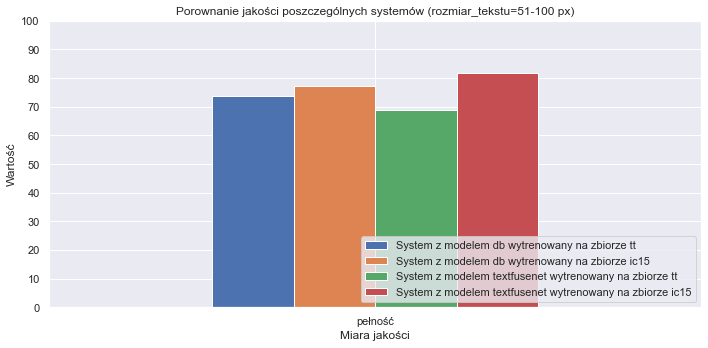

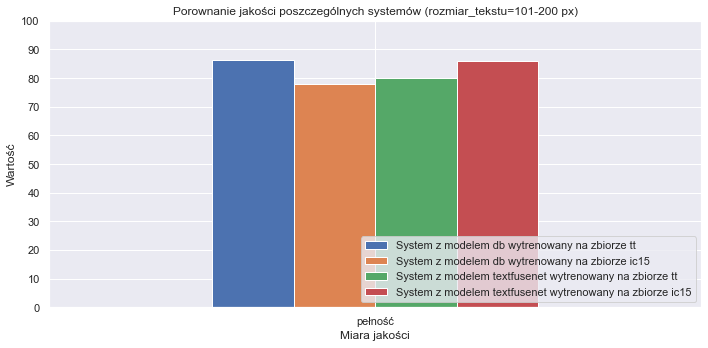

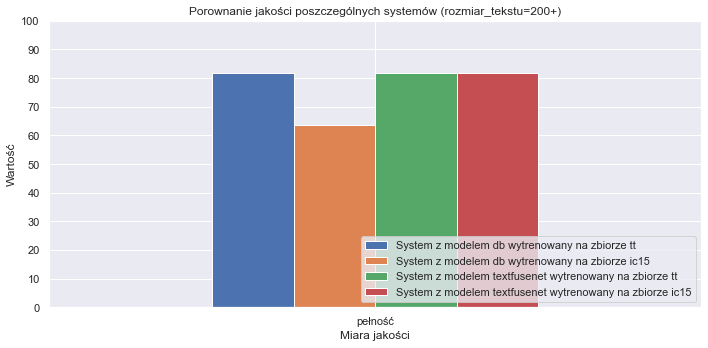

In [18]:
for key, value in detection_metrics.items():
    plot_detection_metrics(value, f"{path}/{key}_detection_metrics.png",
                          title = f"Porownanie jakości poszczególnych systemów ({kategoria}={key})")

## Plot metrics across split category

In [19]:
kategoria

'rozmiar_tekstu'

In [20]:
import seaborn as sns

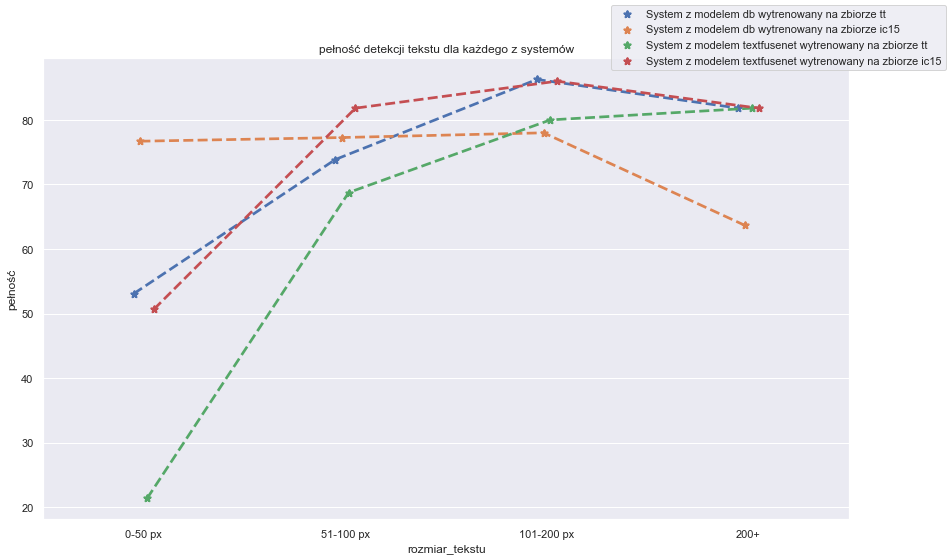

In [48]:
plot_detection_metrics_in_one(detection_metrics, filename=f"{path}/detections_metrics_subplot.jpg", category=kategoria,
                             figsize=(14,8))

### plot detections of each system on random image from totaltext dataset

In [22]:
results.dataset.unique()

array(['ic15'], dtype=object)

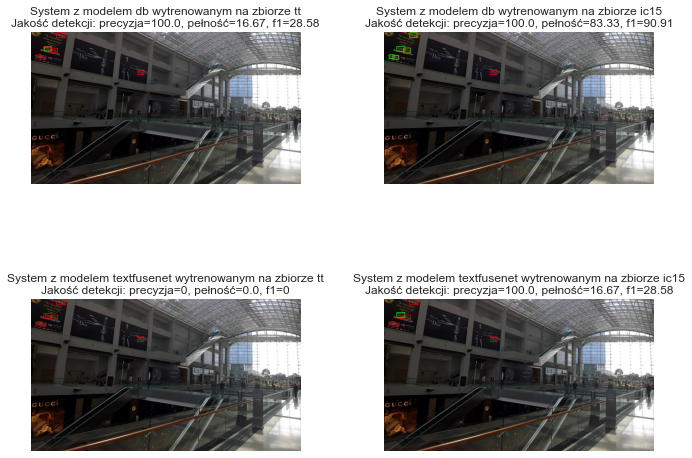

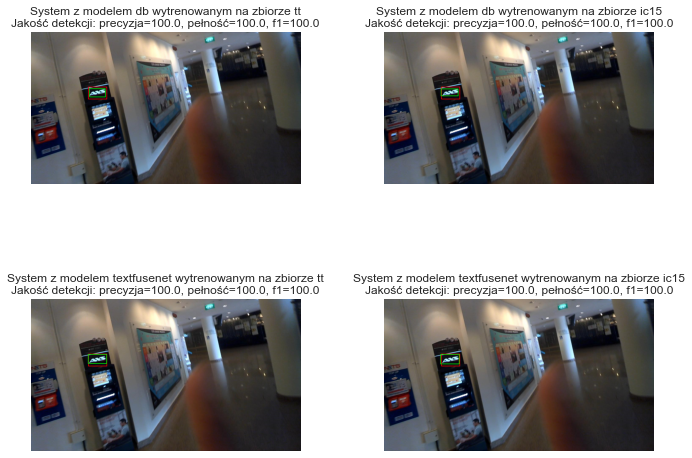

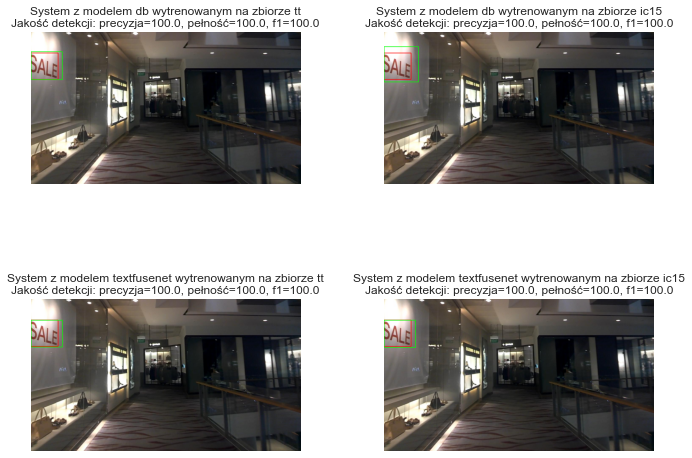

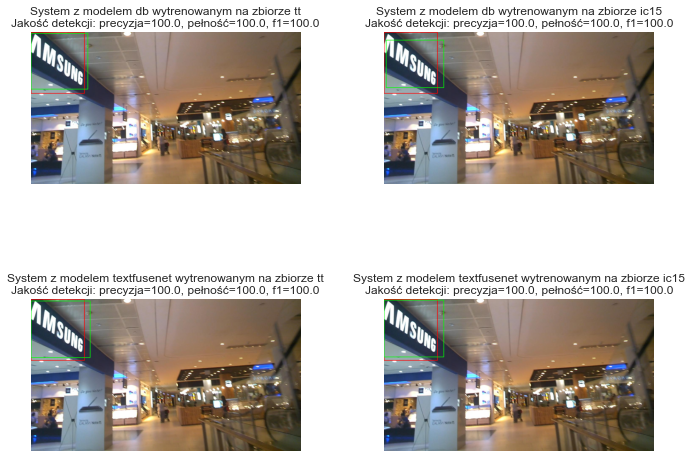

In [23]:
for category in categories:
    
    df = results[results[split_column] == category]
    plot_detections(df, models_list, weights_list, filename=f"{path}/{category}_detections.jpg")

## Recognition results analysis

In [24]:
results[split_column].value_counts()

0-50 px       2472
51-100 px      704
101-200 px     201
200+            44
Name: width, dtype: int64

In [25]:
recognition_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    recognition_metrics[category] = recognition_metrics_to_df(df, models_list, weights_list)

In [26]:
for key, value in recognition_metrics.items():
    print(key)
    
    display(value)

0-50 px


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,72.56,38.51
1,System z modelem db z wagami ic15,70.25,53.88
2,System z modelem textfusenet z wagami tt,73.48,15.70
3,System z modelem textfusenet z wagami ic15,74.12,37.54


51-100 px


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,72.31,53.41
1,System z modelem db z wagami ic15,80.15,61.93
2,System z modelem textfusenet z wagami tt,76.03,52.27
3,System z modelem textfusenet z wagami ic15,75.69,61.93


101-200 px


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,68.18,58.82
1,System z modelem db z wagami ic15,74.36,58.00
2,System z modelem textfusenet z wagami tt,75.00,60.00
3,System z modelem textfusenet z wagami ic15,72.09,62.00


200+


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,33.33,27.27
1,System z modelem db z wagami ic15,42.86,27.27
2,System z modelem textfusenet z wagami tt,33.33,27.27
3,System z modelem textfusenet z wagami ic15,44.44,36.36


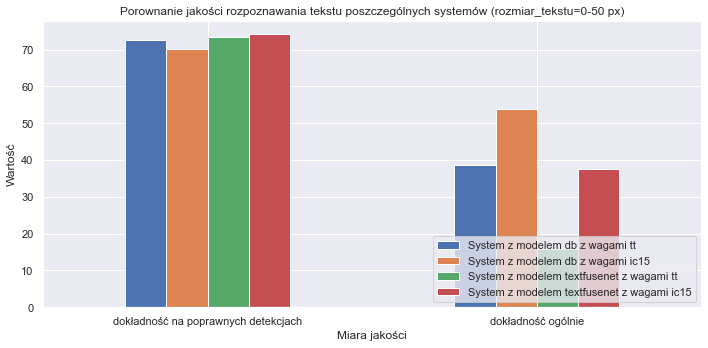

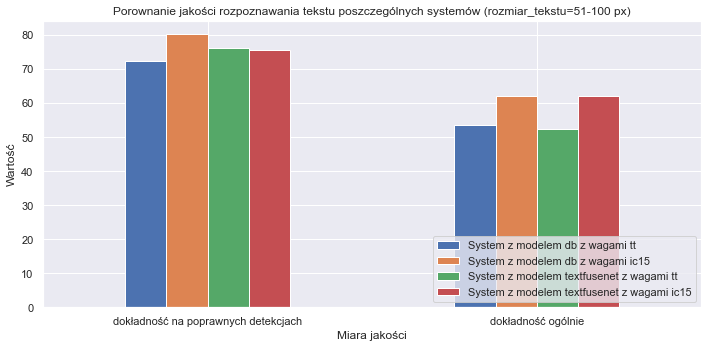

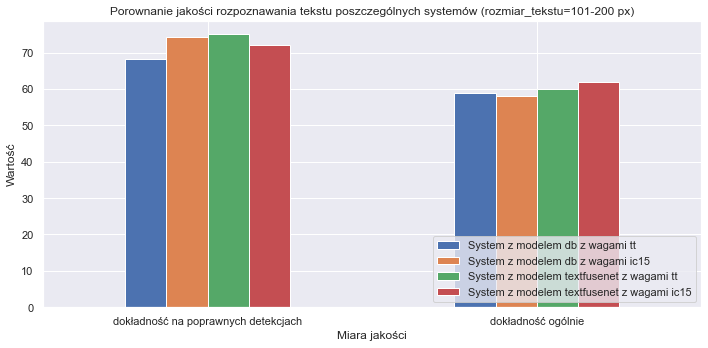

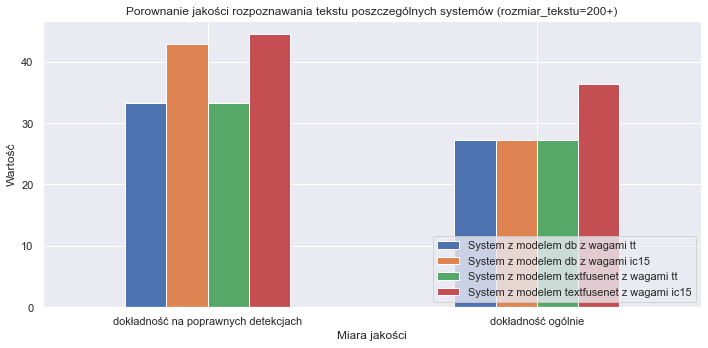

In [27]:
for key, value in recognition_metrics.items():
    print
    plot_recognition_metrics(value, f"{path}/{key}_recognition_metrics.png",
                          title = f"Porownanie jakości rozpoznawania tekstu poszczególnych systemów ({kategoria}={key})")

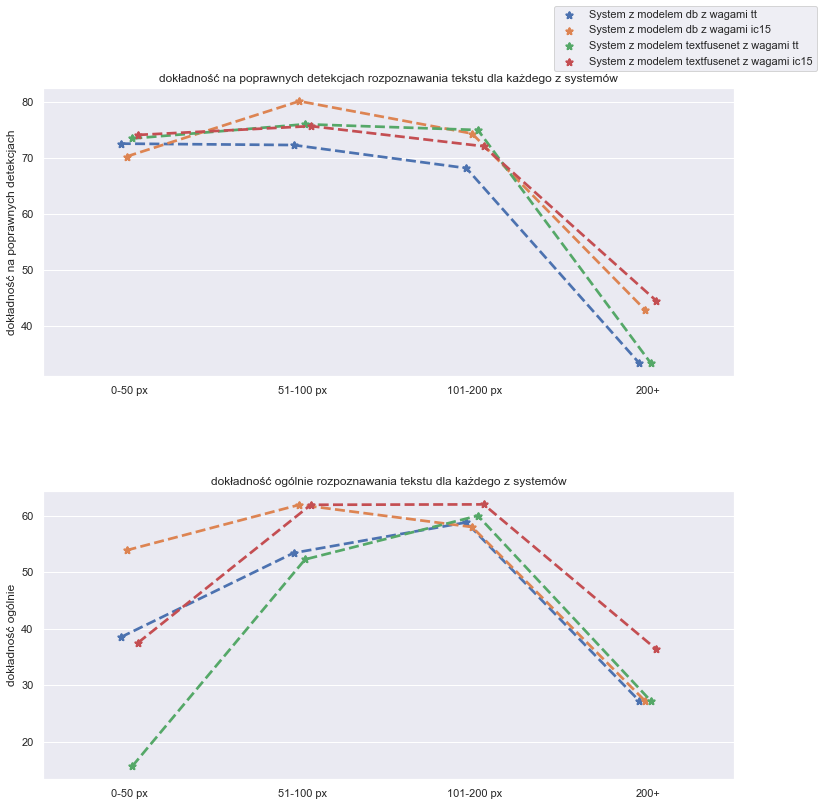

In [47]:
plot_recognition_metrics_in_one(recognition_metrics,
                              filename=f"{path}/recognitions_metrics_subplot.jpg",
                               figsize=(12, 12))

In [29]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
    plot_iou_histogram(df, models_list, weights_list, filename=f"{path}/{category}_iou_histograms.jpg")

0-50 px


ValueError: (15, 10) is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<Figure size 432x288 with 0 Axes>

### Recognition example

In [ ]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
#     print(df)
#     df = df[(df.detection_status=="TP")]
#     df = df[ (df.text_len.between(*split_conditions[category]))]
    plot_recognitions(df, models_list, weights_list, filename=f"{path}/{category}_recognitions.jpg")